<a href="https://www.kaggle.com/code/liadperetz/natural-disaster-signatures?scriptVersionId=149852515" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**Authors:**

* [Natan Grayman (2344104)](https://www.kaggle.com/natangrayman)
* [Liad Peretz (2373287)](https://www.kaggle.com/liadperetz)

# **Introduction**
---
​
Welcome to our Kaggle notebook dedicated to the investigation of Event Signatures on social media. In this exploration, we delve deep into the world of social media, where we've analyzed Twitter data, including location, news response comparison from GDELT, patterns of interest, and trend validations. This thorough analysis led us to explore pivotal events, and in this notebook, we'll specifically focus on the investigation into the natural disasters event archetype.
​
For the natural disasters category, we chose to investigate the following significant events:

**Event 1:**

**Turkey-Syria Earthquake**- On 6 February 2023, at 04:17 TRT (01:17 UTC), a devastating 7.8 earthquake struck southern and central Turkey, with significant repercussions felt in northern and western Syria. This tragic event not only caused substantial damage but also led to a substantial humanitarian crisis.

[Read more about the 2023 Turkey-Syria earthquake on Wikipedia](https://en.wikipedia.org/wiki/2023_Turkey%E2%80%93Syria_earthquake)

---


**Event 2:**

**Mexico Earthquake 2017**- also known as the 2017 Puebla earthquake struck on 19 September 2017 with an estimated magnitude of Mw7.1. It caused significant damage in the Mexican states of Puebla and Morelos and in the Greater Mexico City area, including the collapse of more than 40 buildings.

[Read more about the 2017 Mexico earthquake on Wikipedia](https://en.wikipedia.org/wiki/2017_Puebla_earthquake)







# **Table of Contents**

[1. Twitter Dataset Analysis](#section-one)
   * [Dataset Summary](#section-one-a) 
   * [Number of Tweets per Day](#section-one-b)
   * [Number of Tweets per Hour](#section-one-c)
   * [Likes, Retweets Followers Correlation](#section-one-d)
   * [HashTags](#section-one-e)
   
[2. GDELT Analysis](#section-two)
   * [GDELT Description](#section-two-a)
   * [GDELT Exploratory Data Analysis (EDA)](#section-two-b)
   * [Total Number of Mentions per day](#section-two-c)
   * [GDELT Sentiment Analysis](#section-two-d)
   
   
[3. Google Trends Data Analysis](#section-three)
   * [Google Trends Description](#section-three-a)
   * [Web Search](#section-three-b)
   * [News Search ](#section-three-c)
    
    
    
[4. Pattern of Interest Comparisons](#section-four)
   * [Comparison of Number of Tweets and GDELT Articles per Day](#section-four-a)
   * [Comparison of Normalized Tweets and Normalized Google Trends Web Search Data](#section-four-b)
   * [Comparison of Normalized Tweets and Normalized Google Trends News Search Data](#section-four-c)
    
    
[5. Mathematical Framework](#section-five)
   * [Seasonal Decomposition](#section-five-a)
   * [LOESS Regression](#section-five-b)
   * [Cross-Correlation between the News Media and Social Media](#section-five-c)
    

[6. Mexico Earthquake 2017](#section-six)
   * [Number of Tweets per Day](#section-six-a)
   * [Alignment of Signatures](#section-six-b)
   
   
[7. Event Archetype](#section-seven)
   * [Archetype Curves Formation](#section-seven-a)
   * [Evaluation Metrics](#section-seven-b)

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<a id="section-one"></a>
# **1. Twitter Dataset Analysis**

<a id="section-one-a"></a>
## Dataset Summary

This dataset contains tweets from the 2023 Turkey-Syria earthquake, offering comprehensive information such as tweet text, user profile details, timestamp, and geolocation. It also includes engagement metrics like likes, retweets, and replies, as well as hashtags, mentions, and links in the tweets.

In [ ]:
csv_file_path = '/kaggle/input/turkey-syria-earthquake/Turkey_Syria_Earthquake Tweets.csv'
earthquake_tweets = pd.read_csv(csv_file_path, low_memory=False)

In [ ]:
earthquake_tweets.head()

In [ ]:
print("Dataset shape: ", earthquake_tweets.shape)
print("\nData types:\n", earthquake_tweets.dtypes)

In [ ]:
print('There are {} rows and {} columns in train'.format(earthquake_tweets.shape[0],earthquake_tweets.shape[1]))
print('There are {} rows and {} columns in train'.format(earthquake_tweets.shape[0],earthquake_tweets.shape[1]))

<a id="section-one-b"></a>
## Number of Tweets per Day

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# Assuming earthquake_tweets is your DataFrame with the 'date' column
earthquake_tweets['date'] = pd.to_datetime(earthquake_tweets['date'])  # Convert the 'date' column to datetime

# Resample the data by day and count the number of tweets
tweets_per_day = earthquake_tweets.resample('D', on='date').size()

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the data
ax.plot(tweets_per_day.index, tweets_per_day.values, marker='o')

# Set the x-axis format to display only the date
date_formatter = DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(date_formatter)

# Set the dates starting from the beginning of the event:
specific_dates = [pd.Timestamp('2023-02-06')]  
date_range = pd.date_range(start='2023-02-07', end='2023-02-21', freq='D')
all_dates = specific_dates + date_range.tolist() 

ax.set_xticks(all_dates)

# Ensure that the specific date '2023-02-06' is displayed on the x-axis
ax.axvline(pd.Timestamp('2023-02-06'), color='red', linestyle='--', label='2023-02-06')
ax.legend()

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=60)

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Number of Tweets')
ax.set_title('Number of Tweets per Day')

plt.tight_layout()
plt.show()


**For Poster**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# Assuming earthquake_tweets is your DataFrame with the 'date' column
earthquake_tweets['date'] = pd.to_datetime(earthquake_tweets['date'])  # Convert the 'date' column to datetime

# Resample the data by day and count the number of tweets
tweets_per_day = earthquake_tweets.resample('D', on='date').size()

# Create a figure and axis with the desired aspect ratio
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the data without heading, axes titles, x-axis, and y-axis ticks
ax.plot(tweets_per_day.index, tweets_per_day.values, marker='o', color = "black")

# Set the x-axis format to display only the date
date_formatter = DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(date_formatter)

# Set the dates starting from the beginning of the event:
specific_dates = [pd.Timestamp('2023-02-06')]
date_range = pd.date_range(start='2023-02-07', end='2023-02-21', freq='D')
all_dates = specific_dates + date_range.tolist()

ax.set_xticks(all_dates)

# # Ensure that the specific date '2023-02-06' is displayed on the x-axis
# ax.axvline(pd.Timestamp('2023-02-06'), color='red', linestyle='--', label='2023-02-06')
# ax.legend()

# Remove x-axis labels for better visibility
ax.set_xticklabels([])

# Remove y-axis labels and title
ax.set_yticklabels([])
ax.set_title('')

# Save the plot as a PNG file
plt.savefig('EventSignature_Earthquake.png')

plt.tight_layout()
plt.show()


<a id="section-one-c"></a>
## Number of Tweets per Hour

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming earthquake_tweets is your DataFrame with the 'date' column
earthquake_tweets['date'] = pd.to_datetime(earthquake_tweets['date'])

# Filter the data for the date '2023-02-06'
tweets_on_6th_feb = earthquake_tweets[earthquake_tweets['date'].dt.date == pd.Timestamp('2023-02-06').date()].copy()

# Add a new column 'hour' to represent the hour of each tweet
tweets_on_6th_feb['hour'] = tweets_on_6th_feb['date'].dt.hour

# Create a count plot using Seaborn
plt.figure(figsize=(10, 6))
sns.countplot(data=tweets_on_6th_feb, x='hour', color='blue')  # Set a constant color
plt.xlabel('Hour')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets per Hour on 6 February 2023')
plt.xticks(rotation=60)

plt.tight_layout()
plt.show()


<a id="section-one-d"></a>
## Likes, Retweets Followers Correlation

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming earthquake_tweets is your DataFrame

# Specify the columns you want to plot
columns_to_plot = ['like_count', 'rt_count', 'followers_count']

# Generate histograms for the specified columns
earthquake_tweets[columns_to_plot].hist(bins=10, figsize=(12, 10))

# Set plot labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograms of Specific Columns')

plt.tight_layout()
plt.show()

In [ ]:
import seaborn as sns

# Assuming earthquake_tweets is your DataFrame

# Select the columns you want to calculate correlations for
selected_columns = ['like_count', 'rt_count', 'followers_count']

# Create a subset DataFrame with selected columns
subset_df = earthquake_tweets[selected_columns]

# Calculate the correlation matrix for the subset DataFrame
correlation_matrix = subset_df.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<a id="section-one-e"></a>
##  HashTags

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming earthquake_tweets is your DataFrame

# Calculate the top hashtags
top_hashtags = earthquake_tweets['hashtags'].value_counts().nlargest(10)

# Define a list of colors
bar_colors = ['skyblue', 'lightgreen', 'orange', 'pink', 'purple', 'red', 'blue', 'yellow', 'gray', 'brown']

# Create a bar plot using Matplotlib with custom colors for each bar
plt.figure(figsize=(10, 6))
for idx, (hashtag, count) in enumerate(top_hashtags.items()):
    plt.bar(hashtag, count, color=bar_colors[idx % len(bar_colors)])


plt.ylabel('Frequency')
plt.title('Top 10 Hashtags')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


## Verified Tweets

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming earthquake_tweets is your DataFrame

# Get the counts of verified and unverified tweets
verified_counts = earthquake_tweets['isVerified'].value_counts()

# Create a bar plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=verified_counts.index, y=verified_counts.values)
plt.title("Number of Verified vs Unverified Tweets")
plt.xlabel("Verified Tweets")
plt.ylabel("Number of Tweets")

extra_tick_value = verified_counts[True]
plt.yticks(list(plt.yticks()[0]) + [extra_tick_value])

plt.tight_layout()
plt.show()

<a id="section-two"></a>
# **2. GDELT Analysis**

##  **Global Database of Events, Language, and Tone (GDELT)**
<a id="section-two-a"></a>

 
The Global Database of Events, Language, and Tone (GDELT) is a comprehensive and continuously updated dataset that monitors and records various global events, news articles, and media sources from around the world. GDELT's primary purpose is to provide a vast repository of structured data that researchers, analysts, and data scientists can use to analyze and gain insights into global events, trends, and sentiments.
​
Key features of GDELT include:
​
- **Event Data**: GDELT captures a wide range of events, including political, economic, social, and cultural events, across different countries and regions.
​
- **Media Monitoring**: GDELT scans thousands of news articles, broadcasts, and online sources in multiple languages to extract valuable information.
​
- **Sentiment Analysis**: It includes sentiment analysis and tone indicators, helping to understand the emotional context of news and events.
​
- **Temporal Coverage**: GDELT's data goes back several decades, allowing users to explore historical trends and patterns.
​
- **Geospatial Information**: The dataset includes geospatial information, enabling the mapping of events and their locations.
​
https://www.gdeltproject.org/
​
  Cell In[18], line 3
    The Global Database of Events, Language, and Tone (GDELT) is a comprehensive and continuously updated dataset that monitors and records various global events, news articles, and media sources from around the world. GDELT's primary purpose is to provide a vast repository of structured data that researchers, analysts, and data scientists can use to analyze and gain insights into global events, trends, and sentiments.

<a id="section-two-b"></a>
## **GDELT Exploratory Data Analysis (EDA)**

In [ ]:
import pandas as pd

 

# Create the full file path
file_path = "/kaggle/input/gdelt-syria-turkey-earthquake-morev1/earthquakeV4.csv"

 

# Load the dataset into a Pandas DataFrame
try:
    df = pd.read_csv(file_path,low_memory=False)
    
    # Display the main specifications of the dataset
    print("Dataset Specifications:")
    print(f"File Path: {file_path}")
    print(f"Number of Rows: {len(df)}")
    print(f"Number of Columns: {len(df.columns)}")
    print("Column Names:")
    for column in df.columns:
        print(f" - {column}")
    print("Data Types:")
    for column, dtype in df.dtypes.items():
        print(f" - {column}: {dtype}")
#     print("Summary Statistics:")
#     print(df.describe())
except FileNotFoundError:
    print(f"File '{file_path}' not found.")
except Exception as e:
    print(f"An error occurred: {str(e)}")

**Plot number of datapoints per day (earthquake occurred on the 6 of February)**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Group the data by SQLDATE and count the number of data points for each date
date_counts = df['SQLDATE'].value_counts().sort_index()

# Create a bar graph
plt.figure(figsize=(12, 6))
date_counts.plot(kind='bar', color='skyblue')
plt.title('Number of articles per day')
plt.xlabel('DATE')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<a id="section-two-c"></a>
## **Total Number of Mentions per day**

**Number of Mentions of the Article per day**

**Definition of NumMentions:**
NumMentions=	(NULLABLE;	INTEGER)	This is the total number of mentions of this event across all source documents during the 15 minute update in which it was first seen. Multiple references to an event within a single document also contribute to this count. This can be used as a method of assessing the “importance” of an event: the more discussion of that event, the more likely it is to be significant. The total universe of source documents and the density of events within them vary over time, so it is recommended that this field be normalized by the average or other measure of the universe of events during the time period of interest. This field is actually a composite score of the total number of raw mentions and the number of mentions extracted from reprocessed versions of each article (see the discussion for the Mentions table). NOTE: this field refers only to the first news report to mention an event and is not updated if the event is found in a different context in other news reports. It is included for legacy purposes – for more precise information on the positioning of an event, see the Mentions table.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "/kaggle/input/gdelt-syria-turkey-earthquake-morev1/earthquakeV4.csv"
df = pd.read_csv(file_path, low_memory=False)

# Group the data by SQLDATE and sum the NumMentions for each date
date_mentions = df.groupby('SQLDATE')['NumMentions'].sum()

# Create a bar graph
plt.figure(figsize=(12, 6))
date_mentions.plot(kind='bar', color='skyblue')
plt.title('Total Number of NumMentions per Day')
plt.xlabel('SQLDATE')
plt.ylabel('Total NumMentions')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<a id="section-two-d"></a>
## **GDELT Sentiment Analysis**

**Distribution of sentiment of articles**
This uses the the column title AvgTone to gauge the sentiment.

**Definition of AvgTone:**
AvgTone=	(NULLABLE;	FLOAT)	This is the average “tone” of all documents containing one or more mentions of this event during the 15 minute update in which it was first seen. The score ranges from -100 (extremely negative) to +100 (extremely positive). Common values range between -10 and +10, with 0 indicating neutral. This can be used as a method of filtering the “context” of events as a subtle measure of the importance of an event and as a proxy for the “impact” of that event. For example, a riot event with a slightly negative average tone is likely to have been a minor occurrence, whereas if it had an extremely negative average tone, it suggests a far more serious occurrence. A riot with a positive score likely suggests a very minor occurrence described in the context of a more positive narrative (such as a report of an attack occurring in a discussion of improving conditions on the ground in a country and how the number of attacks per day has been greatly reduced). NOTE: this field refers only to the first news report to mention an event and is not updated if the event is found in a different context in other news reports. It is included for legacy purposes – for more precise information on the positioning of an event, see the Mentions table. NOTE: this provides only a basic tonal assessment of an article and it is recommended that users interested in emotional measures use the Mentions and Global Knowledge Graph tables to merge the complete set of 2,300 emotions and themes from the GKG GCAM system into their analysis of event records. (Source: GDELT database)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Create a histogram of AvgTone with a bin width of 1 unit
bin_width = 1.0
plt.figure(figsize=(12, 6))
plt.hist(df['AvgTone'], bins=int((df['AvgTone'].max() - df['AvgTone'].min()) / bin_width), color='skyblue')
plt.title('Average sentiment of articles')
plt.xlabel('Average Sentiment')
plt.ylabel('Number of Articles')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

start_date = ''
end_date = ''

# Load the dataset
file_path = "/kaggle/input/gdelt-syria-turkey-earthquake-morev1/earthquakeV4.csv"
df_sentiment = pd.read_csv(file_path, parse_dates=['SQLDATE'], low_memory=False)

# Group the data by date and calculate the average sentiment (AvgTone) for each day
average_sentiment_per_day = df_sentiment.groupby('SQLDATE')['AvgTone'].mean()

# Plot the average sentiment over time
plt.figure(figsize=(12, 6))
plt.plot(average_sentiment_per_day.index, average_sentiment_per_day.values, marker='o', linestyle='-')
plt.title('Average Sentiment per Day Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment (AvgTone)')
plt.grid(True)

# Set the date range from '2020-10-15' to '2020-11-08'
date_range = pd.date_range(start='2023-02-06', end='2023-02-21', freq='D')
all_dates = date_range.tolist()


# Set the x-axis ticks to be all_dates and their labels
plt.xticks(all_dates, [date.strftime('%Y-%m-%d') for date in all_dates], rotation=45)

plt.xticks(rotation=80)
# Show the plot
plt.tight_layout()
plt.legend()
plt.show()

**Goldstein Scale of events: Unrest event**

**Definintion of Goldstein Scale:**
GoldsteinScale=	(NULLABLE;	FLOAT)	Each CAMEO event code is assigned a numeric score from -10 to +10, capturing the theoretical potential impact that type of event will have on the stability of a country. This is known as the Goldstein Scale. This field specifies the Goldstein score for each event type. NOTE: this score is based on the type of event, not the specifics of the actual event record being recorded – thus two riots, one with 10 people and one with 10,000, will both receive the same Goldstein score. This can be aggregated to various levels of time resolution to yield an approximation of the stability of a location over time. (Source GDELT Database - BigQuery)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Group the data by GoldsteinScale and count the number of articles for each scale value
goldstein_counts = df['GoldsteinScale'].value_counts().sort_index()

# Create a bar graph
plt.figure(figsize=(12, 6))
goldstein_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Articles per GoldsteinScale')
plt.xlabel('GoldsteinScale')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Group the data by GoldsteinScale and count the number of articles for each scale value
goldstein_counts = df['EventBaseCode'].value_counts()

# Create a bar graph
plt.figure(figsize=(20, 6))
goldstein_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Articles per Event Based Code')
plt.xlabel('Event Based Code')
plt.ylabel('Number of Articles')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Group by 'GoldsteinScale' and calculate the percentage for each unique value
result_table = df['GoldsteinScale'].value_counts(normalize=True).reset_index()
result_table.columns = ['GoldsteinScale Value', 'Percentage of Dataset']
result_table['Percentage of Dataset'] = result_table['Percentage of Dataset'] * 100

print(result_table)

<a id="section-three"></a>
# **3. Google Trends Data Analysis**

<a id="section-three-a"></a>
## **Google Trends Description**

Google Trends is a powerful tool provided by Google for analyzing the popularity of search terms and topics over time. It offers insights into search interest, allowing users to compare and explore keywords on Google's search engine.

## Key Features

Google Trends provides:

- **Search Term Comparison**: Compare multiple terms simultaneously.
- **Time Range Selection**: Analyze trends over different time periods.
- **Location-Based Insights**: Examine regional variations in search trends.
- **Related Queries**: Discover related topics for deeper insights.

## Normalization

Google Trends uses normalization to ensure accurate data representation. It scales search interest data to a relative scale of 0 to 100, considers the chosen time period, and provides regionally adjusted data. This simplifies data interpretation for marketers, researchers, and analysts.

## Functionalities

This analysis utilizes the **Web search** and **News search** functionalities of Google Trends.

<a id="section-three-b"></a>
## **Web Search**

[Google Trend Analysis: Turkey Earthquake, Earthquake, Syria Earthquake](https://trends.google.com/trends/explore?date=2023-02-01%202023-02-21&q=Turkey%20Earthquake,Earthquake,Syria%20Earthquake)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO

# Create a string with the CSV data
csv_data = """Day,Turkey Earthquake: (Worldwide),Earthquake: (Worldwide),Syria Earthquake: (Worldwide)
2023-02-01,0.5,4,0
2023-02-02,0,3,0
2023-02-03,0.5,3,0
2023-02-04,0.5,2,0
2023-02-05,0,3,0
2023-02-06,54,100,4
2023-02-07,47,77,5
2023-02-08,31,53,4
2023-02-09,24,43,4
2023-02-10,21,36,3
2023-02-11,16,30,3
2023-02-12,14,26,2
2023-02-13,11,22,2
2023-02-14,9,19,2
2023-02-15,8,24,1
2023-02-16,7,18,1
2023-02-17,5,13,1
2023-02-18,5,12,1
2023-02-19,4,11,1
2023-02-20,11,23,1
2023-02-21,9,19,1
"""

# Create a DataFrame from the CSV data
df = pd.read_csv(StringIO(csv_data))

# Convert "<1" values to 0.5 (or any appropriate value)
df = df.replace('<1', 0.5)

# Convert "Day" column to datetime
df['Day'] = pd.to_datetime(df['Day'])

# Name the dataframes accordingly
turkey_earthquake_web_df = pd.DataFrame({'Day': df['Day'], 'Turkey Earthquake': df['Turkey Earthquake: (Worldwide)']})
earthquake_web_df = pd.DataFrame({'Day': df['Day'], 'Earthquake': df['Earthquake: (Worldwide)']})
syria_earthquake_web_df = pd.DataFrame({'Day': df['Day'], 'Syria Earthquake': df['Syria Earthquake: (Worldwide)']})

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the data
plt.plot(df['Day'], df['Turkey Earthquake: (Worldwide)'], label='Turkey Earthquake', marker='o')
plt.plot(df['Day'], df['Earthquake: (Worldwide)'], label='Earthquake', marker='o')
plt.plot(df['Day'], df['Syria Earthquake: (Worldwide)'], label='Syria Earthquake', marker='o')

# Set y-axis range from 0 to the maximum value in the dataset
plt.ylim(0, df[['Turkey Earthquake: (Worldwide)', 'Earthquake: (Worldwide)', 'Syria Earthquake: (Worldwide)']].max().max() + 5)

# Set x-axis ticks to match the dates
plt.xticks(df['Day'], rotation=45)

# Merge both legends into a single legend
legend = ax.legend(loc='upper left')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Search Interest')
plt.title('Google Trends Data (Feb 1, 2023 - Feb 21, 2023)')

# Show the plot
plt.tight_layout()
plt.show()


<a id="section-three-c"></a>
## **News Search**
​
​
[Google Trends Analysis: Turkey Syria Earthquake Topic](https://trends.google.com/trends/explore?date=2023-02-01%202023-02-21&gprop=news&q=%2Fg%2F11k9s3kbvy)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO

# Create a string with the CSV data
csv_data = """Day,2023 Turkey–Syria earthquake: (Worldwide)
2023-02-01,0
2023-02-02,0
2023-02-03,8
2023-02-04,0
2023-02-05,6
2023-02-06,87
2023-02-07,100
2023-02-08,86
2023-02-09,70
2023-02-10,55
2023-02-11,53
2023-02-12,44
2023-02-13,40
2023-02-14,39
2023-02-15,38
2023-02-16,34
2023-02-17,28
2023-02-18,20
2023-02-19,20
2023-02-20,19
2023-02-21,23
"""

# Create a DataFrame from the CSV data
df = pd.read_csv(StringIO(csv_data))

# Convert "Day" column to datetime
df['Day'] = pd.to_datetime(df['Day'])

# Name the dataframe
earthquake_web_df = pd.DataFrame({'Day': df['Day'], '2023 Turkey–Syria earthquake: (Worldwide)': df['2023 Turkey–Syria earthquake: (Worldwide)']})

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the data
plt.plot(df['Day'], df['2023 Turkey–Syria earthquake: (Worldwide)'], label='"2023 Turkey–Syria earthquake" ', marker='o')

# Set y-axis range from 0 to the maximum value in the dataset
plt.ylim(0, df['2023 Turkey–Syria earthquake: (Worldwide)'].max() + 10)

# Set x-axis ticks to match the dates
plt.xticks(df['Day'], rotation=45)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Search Interest')
plt.title('Google Trends Data (Feb 1, 2023 - Feb 21, 2023)')

# Merge both legends into a single legend
legend = ax.legend(loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


**Interesting**:

[Web Search of "Earthquake since 2004](https://trends.google.com/trends/explore?date=all&q=%2Fm%2F02r97) 
vs 
[News Search of "Earthquake since 2004](https://trends.google.com/trends/explore?date=all_2008&gprop=news&q=%2Fm%2F02r97)

<a id="section-four"></a>
# **4. Pattern of Interest Comparisons**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# Assuming unrest_tweets2 is your DataFrame with the 'date' column (format from (1))

# Load the dataset from (2)
GDELT_file_path = "/kaggle/input/gdelt-syria-turkey-earthquake-morev1/earthquakeV4.csv"
GDELT_data = pd.read_csv(GDELT_file_path, low_memory=False)

# Earthquake tweets
tweets_file_path = '/kaggle/input/turkey-syria-earthquake/Turkey_Syria_Earthquake Tweets.csv'
earthquake_tweets2 = pd.read_csv(tweets_file_path, low_memory=False)

# Assuming earthquake_tweets is your DataFrame with the 'date' column
earthquake_tweets2['date'] = pd.to_datetime(earthquake_tweets2['date'])  # Convert the 'date' column to datetime

# Resample the data by day and count the number of tweets
tweets_per_day = earthquake_tweets2.resample('D', on='date').size()

# Group the data by SQLDATE and count the number of data points for each date
date_counts = GDELT_data['SQLDATE'].value_counts().sort_index()

# Convert SQLDATE to the same datetime format as in (1)
date_counts.index = pd.to_datetime(date_counts.index, format='%Y%m%d')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the first dataset (from (1))
ax.plot(tweets_per_day.index, tweets_per_day.values, marker='o', label='Number of Tweets per Day', color='skyblue')

# Plot the second dataset (converted from SQLDATE)
ax.plot(date_counts.index, date_counts.values, marker='o', label='Number of GDELT Articles per Day', color='orange')

# Set the x-axis format to display only the date
date_formatter = DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(date_formatter)

# Set the dates starting from the beginning of the event:
specific_dates = [pd.Timestamp('2023-02-06')]
date_range = pd.date_range(start='2023-02-07', end='2023-02-21', freq='D')
all_dates = specific_dates + date_range.tolist()

ax.set_xticks(all_dates)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Count')
ax.set_title('Number of Tweets and GDELT Articles per Day')

# Add a legend
ax.legend()

plt.tight_layout()
plt.show()

<a id="section-four-a"></a>
## **Comparison of Number of Tweets and GDELT Articles per Day**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter


# Group the data by SQLDATE and count the number of data points for each date
date_counts = GDELT_data['SQLDATE'].value_counts().sort_index()

# Convert SQLDATE to the same datetime format as in (1)
date_counts.index = pd.to_datetime(date_counts.index, format='%Y%m%d')

# Normalize the first dataset (from (1)) to the range [0, 1]
max_value_tweets = tweets_per_day.max()
normalized_tweets = tweets_per_day / max_value_tweets

# Normalize the second dataset (converted from SQLDATE) to the range [0, 1]
max_value_articles = date_counts.max()
normalized_date_counts = date_counts / max_value_articles

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the first dataset (normalized from (1)) on the left y-axis
ax.plot(tweets_per_day.index, normalized_tweets.values, marker='o', label='Normalized Number of Tweets per Day', color='skyblue')

# Plot the second dataset (normalized) on the same y-axis
ax.plot(date_counts.index, normalized_date_counts.values, marker='o', label='Normalized Number of GDELT Articles per Day', color='orange')

# Ensure that all dates are displayed on the x-axis
date_range = pd.date_range(start='2023-02-06', end='2023-02-21', freq='D')
ax.set_xticks(date_range)

from datetime import datetime, timedelta

# Initialize an empty list to store weekend dates
weekend_dates = []

# Iterate through all dates and check if they are weekends
for i in range(len(date_range)):
    date = date_range[i]
    if i == 0 and date.dayofweek == 6:
        weekend_dates.append([date,date + timedelta(days=1)])
    elif date.dayofweek == 5:
        weekend_dates.append([date,date + timedelta(days=1)])
    elif date.dayofweek == 6:
        weekend_dates[-1][1]= date + timedelta(days=1)
    

# Print the list of weekend dates
print("Weekend Days:")
print(weekend_dates)

# for weekend in weekend_dates:
#     # Add shaded region for the period between '2020-11-03' and '2020-11-07'
#     ax.axvspan(weekend[0], weekend[1], color='gray', alpha=0.1, label='Weekend')

# Rotate the x-axis labels for better visibility
ax.tick_params(axis='x', rotation=90)

# Plot the vertical start date as a dotted line
start_date = pd.Timestamp('2023-02-06')
ax.axvline(start_date, color='red', linestyle='--', label='Start Date')

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Normalized Count')
ax.set_title('Comparison of Normalized Tweets and Normalized GDELT Articles per Day')

# Add a legend for both datasets
ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

## Comparison of Normalized Tweets and Normalized Google Trends Web Search Data
<a id="section-four-b"></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from io import StringIO

# Create a string with the CSV data
csv_data = """Day,Turkey Earthquake: (Worldwide),Earthquake: (Worldwide),Syria Earthquake: (Worldwide)
2023-02-01,0.5,4,0
2023-02-02,0,3,0
2023-02-03,0.5,3,0
2023-02-04,0.5,2,0
2023-02-05,0,3,0
2023-02-06,54,100,4
2023-02-07,47,77,5
2023-02-08,31,53,4
2023-02-09,24,43,4
2023-02-10,21,36,3
2023-02-11,16,30,3
2023-02-12,14,26,2
2023-02-13,11,22,2
2023-02-14,9,19,2
2023-02-15,8,24,1
2023-02-16,7,18,1
2023-02-17,5,13,1
2023-02-18,5,12,1
2023-02-19,4,11,1
2023-02-20,11,23,1
2023-02-21,9,19,1
"""

# Create a DataFrame from the CSV data
df = pd.read_csv(StringIO(csv_data))

# Convert "<1" values to 0.5 (or any appropriate value)
df = df.replace('<1', 0.5)

# Convert "Day" column to datetime
df['Day'] = pd.to_datetime(df['Day'])

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Ensure that all dates are displayed on the x-axis
date_range = pd.date_range(start='2023-02-01', end='2023-02-21', freq='D')
ax.set_xticks(date_range)

# Normalize each graph to itself
df['Turkey Earthquake: (Worldwide)'] = df['Turkey Earthquake: (Worldwide)'] / df['Turkey Earthquake: (Worldwide)'].max()
df['Earthquake: (Worldwide)'] = df['Earthquake: (Worldwide)'] / df['Earthquake: (Worldwide)'].max()
df['Syria Earthquake: (Worldwide)'] = df['Syria Earthquake: (Worldwide)'] / df['Syria Earthquake: (Worldwide)'].max()

# Plot the first graph (Google Trends Data)
ax.plot(df['Day'], df['Turkey Earthquake: (Worldwide)'], label='Turkey Earthquake', color='blue')
ax.plot(df['Day'], df['Earthquake: (Worldwide)'], label='Earthquake', color='green')
ax.plot(df['Day'], df['Syria Earthquake: (Worldwide)'], label='Syria Earthquake', color='orange')

# Plot the first dataset (normalized from (1)) on the left y-axis
ax.plot(tweets_per_day.index, normalized_tweets.values, marker='o', label='Normalized Number of Tweets per Day', color='red')

# Plot the vertical start date as a dotted line
start_date = pd.Timestamp('2023-02-06')
ax.axvline(start_date, color='red', linestyle='--', label='Start Date')

# Set the x-axis format to display only the date
date_formatter = DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(date_formatter)

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Normalized Search Interest')
ax.set_title('Comparison of Normalized Tweets and Normalized Google Trends Web Search Data')

# Merge all legends into a single legend
legend = ax.legend(loc='upper left')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


## Comparison of Normalized Tweets and Normalized Google Trends News Search Data
<a id="section-four-c"></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from io import StringIO
from datetime import datetime, timedelta

# Create a string with the CSV data for "2023 Turkey–Syria earthquake"
csv_data_earthquake = """Day,2023 Turkey–Syria earthquake: (Worldwide)
2023-02-06,87
2023-02-07,100
2023-02-08,86
2023-02-09,70
2023-02-10,55
2023-02-11,53
2023-02-12,44
2023-02-13,40
2023-02-14,39
2023-02-15,38
2023-02-16,34
2023-02-17,28
2023-02-18,20
2023-02-19,20
2023-02-20,19
2023-02-21,23
"""

# Create a DataFrame from the CSV data
df_earthquake = pd.read_csv(StringIO(csv_data_earthquake))

# Convert "Day" column to datetime
df_earthquake['Day'] = pd.to_datetime(df_earthquake['Day'])

# Group the data by SQLDATE and count the number of data points for each date
date_counts = GDELT_data['SQLDATE'].value_counts().sort_index()

# Convert SQLDATE to the same datetime format as in "2023 Turkey–Syria earthquake"
date_counts.index = pd.to_datetime(date_counts.index, format='%Y%m%d')

# Filter both dataframes to start from 2023-02-06
start_date = pd.Timestamp('2023-02-06')
df_earthquake = df_earthquake[df_earthquake['Day'] >= start_date]
date_counts = date_counts[date_counts.index >= start_date]

# Normalize the first dataset (from GDELT) to the range [0, 1]
max_value_articles = date_counts.max()
normalized_date_counts = date_counts / max_value_articles

# Normalize the second dataset (from "2023 Turkey–Syria earthquake") to the range [0, 1]
max_value_earthquake = df_earthquake['2023 Turkey–Syria earthquake: (Worldwide)'].max()
normalized_earthquake = df_earthquake['2023 Turkey–Syria earthquake: (Worldwide)'] / max_value_earthquake

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the first dataset (normalized from GDELT) on the left y-axis
ax.plot(normalized_date_counts.index, normalized_date_counts.values, marker='o', label='Normalized Number of GDELT Articles per Day', color='skyblue')

# Plot the second dataset (normalized from "2023 Turkey–Syria earthquake") on the same y-axis
ax.plot(df_earthquake['Day'], normalized_earthquake, marker='o', label='Normalized "2023 Turkey–Syria earthquake" Search Interest', color='orange')

# Ensure that all dates are displayed on the x-axis
date_range = pd.date_range(start='2023-02-06', end='2023-02-21', freq='D')
ax.set_xticks(date_range)

# Initialize an empty list to store weekend dates
weekend_dates = []

# Iterate through all dates and check if they are weekends
for i in range(len(date_range)):
    date = date_range[i]
    if i == 0 and date.dayofweek == 6:
        weekend_dates.append([date, date + timedelta(days=1)])
    elif date.dayofweek == 5:
        weekend_dates.append([date, date + timedelta(days=1)])
    elif date.dayofweek == 6:
        weekend_dates[-1][1] = date + timedelta(days=1)
        
# Initialize a flag to check if the "Weekend" label has been added to the legend
weekend_label_added = False

for weekend in weekend_dates:
    # Add shaded region for the period between '2020-11-03' and '2020-11-07'
    ax.axvspan(weekend[0], weekend[1], color='gray', alpha=0.1)
    
    if not weekend_label_added:
        ax.plot([], [], color='gray', alpha=0.1, label='Weekend')
        weekend_label_added = True  # Set the flag to True to indicate the label has been added

# Rest of the code remains the same


# Rotate the x-axis labels for better visibility
ax.tick_params(axis='x', rotation=90)

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Normalized Count')
ax.set_title('Comparison of Normalized GDELT Articles and Normalized "2023 Turkey–Syria earthquake" Search Interest per Day')

# Merge both legends into a single legend
legend = ax.legend(loc='upper right')

plt.tight_layout()
plt.show()


<a id="section-five"></a>
# 5. Mathematical Framework

<a id="section-five-a"></a>
## **Seasonal Decomposition**

## Components of decompsition:

**1. Trend Component:**

The trend component represents the underlying **long-term behavior** or trend in the data. In this context, it represents whether data is showing an general trend of increasing, decreasing, or remaining relatively stable over time.
By examining the trend component, you can identify significant shifts or changes in the overall trend, such as periods of rapid growth or decline.

**2. Seasonal Component:**

The seasonal component captures **repeating patterns** or seasonality in the data. Seasonality refers to regular fluctuations in the data that occur at fixed intervals, such as daily, weekly, monthly, or yearly patterns.
By analyzing the seasonal component, you can identify and understand the seasonal patterns in the number of GDELT articles. For example, you can determine if there are specific times of the year or week when article counts tend to be higher or lower.

**3. Residual Component:**

The residual component represents the **unexplained or random variation in the data** that remains after removing the trend and seasonal components. It includes noise and irregular fluctuations.
Examining the residual component can help you identify unusual or unexpected events that are not explained by the trend or seasonality. Large residual values may indicate outliers or anomalies in the data.

### Additive vs. Multiplicative Decomposition:

- **Additive Decomposition:** Divides the data into three components - trend, seasonal, and residual. It's suitable when the seasonal effect remains constant over time.

- **Multiplicative Decomposition:** Also separates data into trend, seasonal, and residual components, but in this method, they are multiplied together. Use this when the seasonal effect scales with the data's level.

### "Period" Parameter:

The "period" parameter specifies the number of data points in one complete season. For daily data with annual seasonality, set "period" to 365.

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Group the data by SQLDATE and count the number of data points for each date
date_counts = GDELT_data['SQLDATE'].value_counts().sort_index()

# Convert SQLDATE to the same datetime format as in (1)
date_counts.index = pd.to_datetime(date_counts.index, format='%Y%m%d')

# Decompose the time series
decomposition = seasonal_decompose(date_counts, model='additive')  # Assuming annual seasonality (365 days)

# Plot the original data
plt.figure(figsize=(12, 6))
plt.plot(date_counts.index, date_counts.values, marker='o', label='Number of GDELT Articles per Day', color='orange')

# Plot the trend component
plt.plot(decomposition.trend.index, decomposition.trend.values, label='Trend', linestyle='--', color='blue')

# Plot the seasonal component
plt.plot(decomposition.seasonal.index, decomposition.seasonal.values, label='Seasonal', linestyle='--', color='green')

# Plot the residual component
plt.plot(decomposition.resid.index, decomposition.resid.values, label='Residual', linestyle='--', color='red')


plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Decomposition of GDELT Articles Time Series')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming you have already resampled 'us_election_data' to get 'tweets_per_day'
# Ensure 'tweets_per_day' is a Pandas Series with a datetime index

# Decompose the time series
decomposition = seasonal_decompose(tweets_per_day, model='additive')  # Assuming annual seasonality (365 days)

# Create a figure
plt.figure(figsize=(12, 6))

# Plot the original data
plt.plot(tweets_per_day.index, tweets_per_day.values, marker='o', label='Number of Tweets per Day', color='skyblue')

# Plot the trend component
plt.plot(decomposition.trend.index, decomposition.trend.values, label='Trend', linestyle='--', color='blue')

# Plot the seasonal component
plt.plot(decomposition.seasonal.index, decomposition.seasonal.values, label='Seasonal', linestyle='--', color='green')

# Plot the residual component
plt.plot(decomposition.resid.index, decomposition.resid.values, label='Residual', linestyle='--', color='red')

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Decomposition of Tweets Time Series')
plt.legend()
plt.savefig("Turk_SyriaSeasonalDecomposition.png")
plt.show()



In this notebook, we initially utilized interactive widget functionality to test various combinations of seasonality frequency and decomposition method. This feature allowed us to dynamically visualize the decomposition results based on user-selected parameters.

The code for the interactive widgets has been commented out in this version of the notebook because when viewing this notebook in Kaggle's static mode, interactive widgets are not functional. 


In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from matplotlib.dates import DateFormatter
# from statsmodels.tsa.seasonal import seasonal_decompose
# import ipywidgets as widgets
# from ipywidgets import interact

# # Group the data by SQLDATE and count the number of data points for each date
# date_counts = GDELT_data['SQLDATE'].value_counts().sort_index()

# # Convert SQLDATE to the same datetime format as in (1)
# date_counts.index = pd.to_datetime(date_counts.index, format='%Y%m%d')

# # Create a function to decompose the time series with interactive seasonality selection
# def decompose_and_plot(seasonality_frequency, decomposition_method):
#     # Decompose the time series with the chosen seasonality frequency and method
#     if decomposition_method == 'Additive':
#         decomposition = seasonal_decompose(date_counts, model='additive', period=seasonality_frequency)
#     else:
#         decomposition = seasonal_decompose(date_counts, model='multiplicative', period=seasonality_frequency)
    
#     # Plot the original data
#     plt.figure(figsize=(12, 6))
#     plt.plot(date_counts.index, date_counts.values, marker='o', label='Number of GDELT Articles per Day', color='orange')

#     # Plot the trend component
#     plt.plot(decomposition.trend.index, decomposition.trend.values, label='Trend', linestyle='--', color='blue')

#     # Plot the seasonal component
#     plt.plot(decomposition.seasonal.index, decomposition.seasonal.values, label='Seasonal', linestyle='--', color='green')

#     # Plot the residual component
#     plt.plot(decomposition.resid.index, decomposition.resid.values, label='Residual', linestyle='--', color='red')

#     plt.xlabel('Date')
#     plt.ylabel('Count')
#     plt.title(f'Decomposition of GDELT Articles Time Series (Seasonality Frequency: {seasonality_frequency}, Method: {decomposition_method})')
#     plt.legend()
#     plt.show()

# # Create a slider widget for choosing seasonality frequency
# seasonality_frequency_slider = widgets.IntSlider(
#     value=1,  # Start with a seasonality frequency of 1
#     min=1,
#     max=365,  # Adjust the maximum based on your data's seasonality
#     step=1,
#     description='Seasonality Frequency:',
#     continuous_update=False
# )


# # Create a dropdown widget for choosing decomposition method
# decomposition_method_dropdown = widgets.Dropdown(
#     options=['Additive', 'Multiplicative'],
#     value='Additive',
#     description='Decomposition Method:',
#     disabled=False,
# )

# # Create an interactive plot
# interact(decompose_and_plot, seasonality_frequency=seasonality_frequency_slider, decomposition_method=decomposition_method_dropdown)

<a id="section-five-b"></a>
## **LOESS Regression:**

####  LOESS — locally estimated scatterplot smoothing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm


# Normalize the first dataset (from (1)) to the range [0, 1]
max_value_tweets = tweets_per_day.max()
normalized_tweets = tweets_per_day / max_value_tweets

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the first dataset (Number of Tweets per Day)
ax.plot(tweets_per_day.index, normalized_tweets.values, marker='o', label='Number of Tweets per Day', color='skyblue')

# Apply LOESS smoothing
lowess_0_23999 = sm.nonparametric.lowess(normalized_tweets.values, tweets_per_day.index, frac=0.3499)  # You can adjust the 'frac' parameter to control the smoothing
lowess_0_24 = sm.nonparametric.lowess(normalized_tweets.values, tweets_per_day.index, frac=0.4)  # You can adjust the 'frac' parameter to control the smoothing

# Extract smoothed values
smoothed_values_0_23999 = lowess_0_23999[:, 1]
smoothed_values_0_24 = lowess_0_24[:, 1]

# Plot the smoothed curve
ax.plot(tweets_per_day.index, smoothed_values_0_23999, label='LOESS Smoothed (frac=0.3499)', color='orange', linewidth=2)
ax.plot(tweets_per_day.index, smoothed_values_0_24, label='LOESS Smoothed (frac=0.4)', color='purple', linewidth=2)

# Add labels and legend
ax.set_xlabel('Date')
ax.set_ylabel('Count')
ax.set_title('Number of Tweets per Day with LOESS Smoothing')
ax.legend()

plt.savefig("SAUnrestLOESSReg.png")

# Show the plot
plt.show()


### **Other Regression Techniques**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Your data preparation code here...

# Define the exponential decay function
def exponential_decay(x, A, k):
    return A * np.exp(-k * x)

# Fit the exponential decay function to your data
x_data = np.arange(len(normalized_tweets))
y_data = normalized_tweets.values
params_tweets, _ = curve_fit(exponential_decay, x_data, y_data)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the first dataset (normalized tweets)
ax.plot(tweets_per_day.index, normalized_tweets.values, marker='o', label='Normalized Number of Tweets per Day', color='skyblue')

# Plot the second dataset (normalized GDELT articles)
ax.plot(date_counts.index, normalized_date_counts.values, marker='o', label='Normalized Number of GDELT Articles per Day', color='orange')

# Plot the exponentially decreasing line for tweets
x_fit = np.arange(len(normalized_tweets))
y_fit_tweets = exponential_decay(x_fit, *params_tweets)
ax.plot(tweets_per_day.index, y_fit_tweets, linestyle='--', color='red', label=f'Tweets Approximation: A={params_tweets[0]:.2f}, k={params_tweets[1]:.2f}')

# Fit the exponential decay function to the GDELT data
x_data_gdelt = np.arange(len(normalized_date_counts))
y_data_gdelt = normalized_date_counts.values
params_gdelt, _ = curve_fit(exponential_decay, x_data_gdelt, y_data_gdelt)

# Plot the exponentially decreasing line for GDELT articles
y_fit_gdelt = exponential_decay(x_data_gdelt, *params_gdelt)
ax.plot(date_counts.index, y_fit_gdelt, linestyle='--', color='green', label=f'GDELT Approximation: A={params_gdelt[0]:.2f}, k={params_gdelt[1]:.2f}')

# Your code for formatting the plot...

# Add a legend for all datasets
ax.legend(loc='upper right')

# Print the mathematical expressions for both curves
print(f"Mathematical Expression for Tweets: y = {params_tweets[0]:.2f} * e^({-params_tweets[1]:.2f} * x)")
print(f"Mathematical Expression for GDELT: y = {params_gdelt[0]:.2f} * e^({-params_gdelt[1]:.2f} * x)")

plt.tight_layout()
plt.show()


<a id="section-five-c"></a>
## **Cross-Correlation between the News Media and Social Media** 

## Pearson Correlation

The Pearson correlation coefficient, often denoted as `r`, is a measure of the linear relationship between two sets of data points. It quantifies how well the data points fit a straight line.

### What is Pearson Correlation?

- Pearson correlation is used to assess the strength and direction of a linear relationship between two variables.
- It provides a value between -1 and 1:
  - `1` indicates a perfect positive linear relationship (as one variable increases, the other also increases linearly).
  - `-1` indicates a perfect negative linear relationship (as one variable increases, the other decreases linearly).
  - `0` indicates no linear relationship.


Where:
- `Xi` and `Yi` are individual data points from sets X and Y.
- `X̄` and `Ȳ` are the means (average values) of X and Y, respectively.

In Python, you can calculate the Pearson correlation coefficient using libraries like NumPy and SciPy.


In [ ]:
import numpy as np

# Calculate the Pearson correlation coefficient at k=0
correlation_coefficient = np.corrcoef(normalized_tweets, normalized_date_counts)[0, 1]

# Print the correlation coefficient
print(f'Pearson Correlation Coefficient: {correlation_coefficient}')


## Cross-Correlation

Cross-correlation is a technique used to measure the similarity between two signals or data sets as a function of the time lag between them. It is commonly used in signal processing, time series analysis, and various scientific applications.

### What is Cross-Correlation?

- Cross-correlation quantifies how well one signal matches another when one is shifted by a certain time lag.
- It is used to identify patterns, periodicity, or relationships between two signals, even if they are not necessarily linearly related.
- Cross-correlation can be used to find time delays, detect repeating patterns, or compare signals in various scientific fields.

### Formula for Discrete Data

The formula for cross-correlation between two discrete data sets X and Y with n data points each is:

[Cross-Correlation Formula](https://allaboutcircuits.com/technical-articles/understanding-correlation/)

R(k)=  ∑(X(t)⋅Y(t−k))







## Cross-Correlation

Cross-correlation is a technique used to measure the similarity between two signals or data sets as a function of the time lag between them. It is commonly used in signal processing, time series analysis, and various scientific applications.

### What is Cross-Correlation?

- Cross-correlation quantifies how well one signal matches another when one is shifted by a certain time lag.
- It is used to identify patterns, periodicity, or relationships between two signals, even if they are not necessarily linearly related.
- Cross-correlation can be used to find time delays, detect repeating patterns, or compare signals in various scientific fields.

### Formula for Discrete Data

The formula for cross-correlation between two discrete data sets X and Y with n data points each is:

R(k) = ∑(X(t)⋅Y(t−k))


Here, `R(k)` represents the cross-correlation at time lag `k`, `X(t)` and `Y(t)` are discrete data points, and `∑` denotes summation over all data points.

### Comparing Delay at Different Points

- Cross-correlation allows us to compare the similarity or alignment between two signals at various time lags (`k`).
- Positive peaks in the cross-correlation function indicate that one signal follows the other with a specific time delay (`k`).
- Negative peaks suggest that one signal leads the other.
- A time lag of `k = 0` means the signals are synchronized, while other values of `k` represent time offsets or delays.

By analyzing the cross-correlation function, researchers can determine the time lag at which the two signals are most similar or divergent, providing valuable insights into their temporal dynamics and relationships.



In [ ]:
import numpy as np
from scipy.signal import correlate
import pandas as pd

# Calculate Cross-Correlation
cross_corr = correlate(normalized_tweets, normalized_date_counts, mode='full', method='fft')

# Calculate Time Lags
time_lags = np.arange(-len(normalized_tweets) + 1, len(normalized_date_counts))

# Initialize an empty list to store the data
correlation_data = []

# Calculate the correlation at each time lag and store it in the list
for lag, correlation in zip(time_lags, cross_corr):
    if lag >= -15 and lag <= 15:  # Filter to include time lags from -15 to 15
        correlation_data.append({'k (Time Lag in Days)': lag, 'Cross-Correlation': correlation})

# Create a DataFrame from the list of dictionaries
correlation_table = pd.DataFrame(correlation_data)

# Print the correlation values at each time lag including the value of k
print(correlation_table.to_string(index=False))

# Calculate and print the cross-correlation at k=0
cross_corr_at_k_zero = cross_corr[len(normalized_tweets) - 1]
print(f'Cross-Correlation at k=0: {cross_corr_at_k_zero}')


In [ ]:
import numpy as np
from scipy.signal import correlate

# Calculate Cross-Correlation
cross_corr = correlate(normalized_tweets, normalized_date_counts, mode='full')

# Calculate Time Lags
time_lags = np.arange(-len(normalized_tweets) + 1, len(normalized_date_counts))

# Find the Peak of Cross-Correlation
max_lag_index = np.argmax(cross_corr)
time_delay = time_lags[max_lag_index]

# Plot Cross-Correlation Function
plt.figure(figsize=(10, 6))
plt.plot(time_lags, cross_corr)
plt.xlabel('Time Lag (Days)')
plt.ylabel('Cross-Correlation')
plt.title('Cross-Correlation Between Tweets and GDELT Articles')
plt.grid(True)

# Mark the Peak
plt.axvline(time_delay, color='red', linestyle='--', label=f'Max Cross-Correlation at Lag {time_delay} days')
plt.legend()

# Show the plot
plt.show()

# Print the identified time delay
print(f' Time Delay with highest cross correlation , k = {time_delay}: {cross_corr[max_lag_index]}')


<a id="section-six"></a>
# **6.  Mexico earthquake September 2017**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
csv_file_path= '/kaggle/input/mexico-earthquake-2017/Extracted_Mexico_earthquake.csv'
mexico_tweets = pd.read_csv(csv_file_path, low_memory=False)
csv_file_path= '/kaggle/input/mexico-earthquake-2/Extracted_Mexico_earthquake5.csv'
mexico_tweets2 = pd.read_csv(csv_file_path, low_memory=False)
csv_file_path= '/kaggle/input/mexico-earthquake-3/Extracted_Mexico_earthquake7_lessHashtags.csv'
mexico_tweets3 = pd.read_csv(csv_file_path, low_memory=False)
csv_file_path= '/kaggle/input/mexico-earthquake-4/Extracted_Mexico_earthquake8_lessHashtags.csv'
mexico_tweets4 = pd.read_csv(csv_file_path, low_memory=False)
csv_file_path= '/kaggle/input/mexico-earthquake-5/Extracted_Mexico_earthquake9_lessHashtags.csv'
mexico_tweets5 = pd.read_csv(csv_file_path, low_memory=False)

In [ ]:
mexico_tweets.head(30)

In [ ]:
print('There are {} rows and {} columns in the twitter dataset'.format(mexico_tweets.shape[0],mexico_tweets.shape[1]))

In [ ]:
print('There are {} rows and {} columns in the twitter dataset'.format(mexico_tweets4.shape[0],mexico_tweets2.shape[1]))

### Function to convert date format from tweets:

Example:
"Sun Sep 24 17:00:28 +0000 2017" to 2017-09-24

In [ ]:
from datetime import datetime, timedelta
def convert_dates(date_str):
    try:
        date_obj = datetime.strptime(date_str, "%a %b %d %H:%M:%S +0000 %Y")
        formatted_date = date_obj.strftime("%Y-%m-%d")
        return formatted_date
    except ValueError:
        print(date_str)
        return None

## Number of Tweets per Day
<a id="section-six-a"></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# # Assuming earthquake_tweets is your DataFrame with the 'date' column
mexico_tweets['date'] = pd.to_datetime(mexico_tweets["Tweet Created At"].apply(convert_dates)) # Convert the 'date' column to datetime

# Assuming earthquake_tweets is your DataFrame with the 'date' column
mexico_tweets2['date'] = pd.to_datetime(mexico_tweets2["Tweet Created At"].apply(convert_dates))  # Convert the 'date' column to datetime

# Assuming earthquake_tweets is your DataFrame with the 'date' column
mexico_tweets3['date'] = pd.to_datetime(mexico_tweets3["Tweet Created At"].apply(convert_dates))  # Convert the 'date' column to datetime

# Assuming earthquake_tweets is your DataFrame with the 'date' column
mexico_tweets4['date'] = pd.to_datetime(mexico_tweets4["Tweet Created At"].apply(convert_dates))  # Convert the 'date' column to datetime

# Assuming earthquake_tweets is your DataFrame with the 'date' column
mexico_tweets5['date'] = pd.to_datetime(mexico_tweets5["Tweet Created At"].apply(convert_dates))  # Convert the 'date' column to datetime

# Resample the data by day and count the number of tweets
mexico_tweets_per_day = mexico_tweets.resample('D', on='date').size()

# Resample the data by day and count the number of tweets
mexico_tweets_per_day2 = mexico_tweets2.resample('D', on='date').size()

# Resample the data by day and count the number of tweets
mexico_tweets_per_day3 = mexico_tweets3.resample('D', on='date').size()

# Resample the data by day and count the number of tweets
mexico_tweets_per_day4 = mexico_tweets4.resample('D', on='date').size()

# Resample the data by day and count the number of tweets
mexico_tweets_per_day5 = mexico_tweets5.resample('D', on='date').size()

print(mexico_tweets_per_day)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the data
ax.plot(mexico_tweets_per_day.index, mexico_tweets_per_day.values, marker='o')
ax.plot(mexico_tweets_per_day2.index, mexico_tweets_per_day2.values, marker='o', label ="Newer tweet extraction")
ax.plot(mexico_tweets_per_day3.index, mexico_tweets_per_day3.values, marker='o', label ="Newer tweet extraction (Less Hashtags)")
ax.plot(mexico_tweets_per_day4.index, mexico_tweets_per_day4.values, marker='o', label ="Newer tweet extraction (Less Hashtags-After further extraction)")
ax.plot(mexico_tweets_per_day5.index, mexico_tweets_per_day5.values, marker='o', label ="5Newer tweet extraction (Less Hashtags-After further further extraction)")


# Set the x-axis format to display only the date
date_formatter = DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(date_formatter)

# Set the dates starting from the beginning of the event:
specific_dates = [pd.Timestamp('2017-09-19')]  
date_range = pd.date_range(start='2017-09-20', end='2017-09-30', freq='D')
all_dates = specific_dates + date_range.tolist() 

ax.set_xticks(all_dates)

# # Ensure that the specific date '2023-02-06' is displayed on the x-axis
# ax.axvline(pd.Timestamp('2023-02-06'), color='red', linestyle='--', label='2023-02-06')
# ax.legend()

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Number of Tweets')
ax.set_title('Number of Tweets per Day (Mexico Earthquake)')
# Add a legend for all datasets
ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

## **Google Trends:**
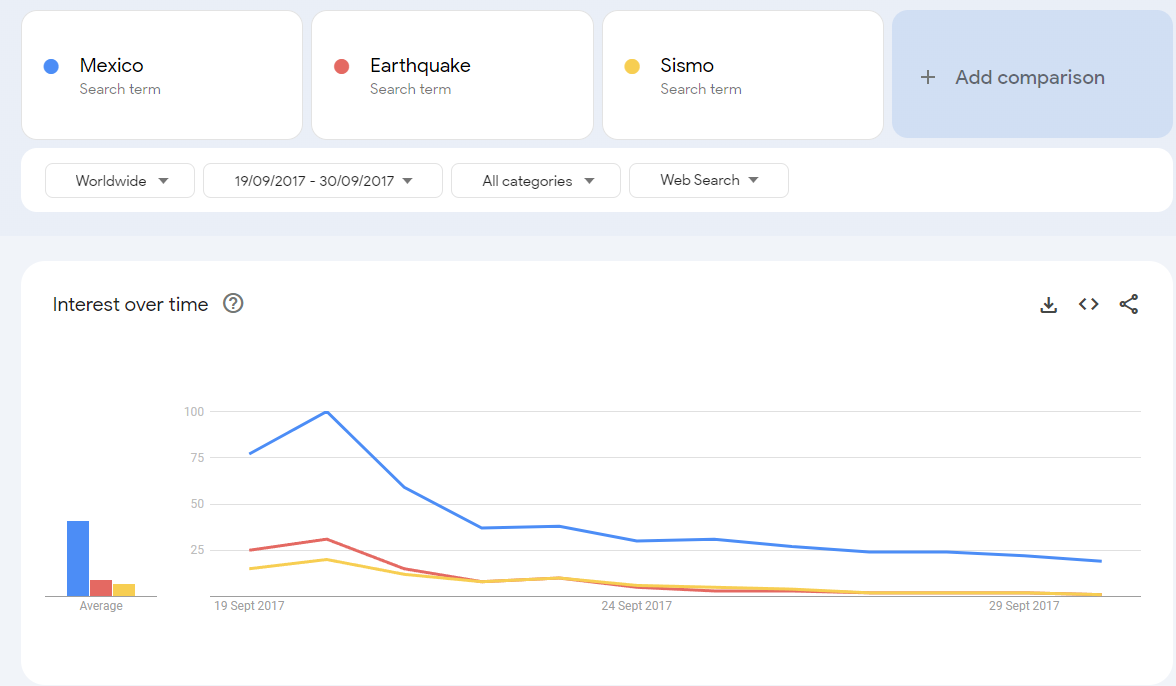
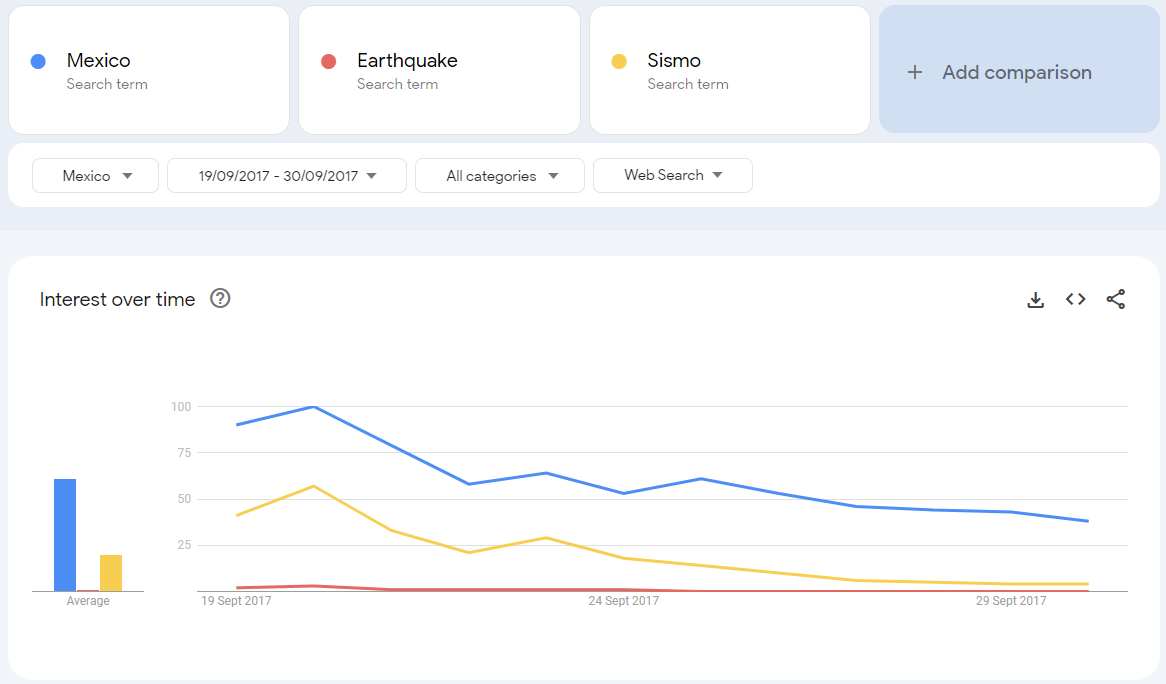

https://trends.google.com/trends/explore?date=2017-09-19%202017-09-30&q=Mexico,Earthquake,Sismo&hl=en-GB

## Alignment of Signatures
<a id="section-six-b"></a>

In [ ]:
import pandas as pd
import numpy as np
from scipy.signal import correlate

def find_best_matching_section(pattern_df_1, pattern_df_2):
    
    isdf_1biggerdf_2 = True
    
    if len(pattern_df_1) >= len(pattern_df_2):
        short_pattern_df = pd.DataFrame({'Value': pattern_df_2})
        long_pattern_df = pd.DataFrame({'Value': pattern_df_1})
        isdf_1biggerdf_2 = True
        
    else:
        short_pattern_df = pd.DataFrame({'Value': pattern_df_1})
        long_pattern_df = pd.DataFrame({'Value': pattern_df_2})
        isdf_1biggerdf_2 = False
        
    # Convert DataFrames to NumPy arrays
    short_pattern = short_pattern_df['Value'].to_numpy()
    long_pattern = long_pattern_df['Value'].to_numpy()

    # Initialize variables to store best correlation and its position
    best_correlation = -1  # Initialize with a low value
    best_position = None

    # Iterate through all possible alignments of the two patterns
    for position in range(len(long_pattern) - len(short_pattern) + 1):
        sub_long_pattern = long_pattern[position:position + len(short_pattern)]

        # Resize short_pattern to match the length of sub_long_pattern
        resized_short_pattern = short_pattern

        correlation = np.corrcoef(sub_long_pattern, resized_short_pattern)[0, 1]

        # Update the best correlation and its position if a better one is found
        if correlation > best_correlation:
            best_correlation = correlation
            best_position = position

    # Extract the best matching section from the longer pattern
    best_matching_section = long_pattern[best_position:best_position + len(short_pattern)]
    
    cut_long_pattern = best_matching_section
    

    # Return the best correlation and best matching section
    # Make sure the patterns are return in the original order they were inputted
    # if longer pattern in first input then longer pattern is in first output pattern
    
    if isdf_1biggerdf_2:
        return best_correlation, cut_long_pattern, short_pattern
    else: 
        return best_correlation, short_pattern, cut_long_pattern

In [ ]:
print(tweets_per_day)
print(mexico_tweets_per_day4)

In [ ]:

Turk_tweets_per_day_data = {"date": tweets_per_day.index,
                          "count": tweets_per_day.values}

Mexico_tweets_per_day_data = {"date": mexico_tweets_per_day4.index,
                          "count": mexico_tweets_per_day4.values}

# Create a DataFrame from the data
Turk_tweets_per_day_df = pd.DataFrame(Turk_tweets_per_day_data)

# Create a DataFrame from the data
Mexico_tweets_per_day_df = pd.DataFrame(Mexico_tweets_per_day_data)

# Normalize the data
Turk_tweets_per_day_df['Normalized_Count'] = (Turk_tweets_per_day_df['count'] - Turk_tweets_per_day_df['count'].min()) / (Turk_tweets_per_day_df['count'].max() - Turk_tweets_per_day_df['count'].min())
Mexico_tweets_per_day_df['Normalized_Count'] = (Mexico_tweets_per_day_df['count'] - Mexico_tweets_per_day_df['count'].min()) / (Mexico_tweets_per_day_df['count'].max() - Mexico_tweets_per_day_df['count'].min())

best_correlation, Mexico_tweets_per_day_filtered, Turk_tweets_per_day_filtered = find_best_matching_section(Mexico_tweets_per_day_df["Normalized_Count"], Turk_tweets_per_day_df["Normalized_Count"])

Mexico_tweets_per_day_filtered_normalized = (Mexico_tweets_per_day_filtered - Mexico_tweets_per_day_filtered.min()) / (Mexico_tweets_per_day_filtered.max() - Mexico_tweets_per_day_filtered.min())
Turk_tweets_per_day_filtered_normalized = (Turk_tweets_per_day_filtered - Turk_tweets_per_day_filtered.min()) / (Turk_tweets_per_day_filtered.max() - Turk_tweets_per_day_filtered.min())

# Sample data (replace with your actual data)
data = {
    'Date': [i+1 for i in range(len(Turk_tweets_per_day_filtered_normalized))],
    'Turkey_Syria': Turk_tweets_per_day_filtered_normalized,
    'Mexico': Mexico_tweets_per_day_filtered_normalized
}
print(f"Correlation of best patterns: {best_correlation}")

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import euclidean, cityblock
from scipy.stats import pearsonr
from scipy.spatial import distance
from scipy.spatial.distance import jaccard


# Create a DataFrame from the data
data_df = pd.DataFrame(data)
# Generic names to be transferable
key1 = 'Turkey_Syria'
key2 = 'Mexico'

# Normalize the signatures using Min-Max scaling
scaler = MinMaxScaler()
data_df[[key1, key2]] = scaler.fit_transform(data_df[[key1, key2]])

# Calculate cosine similarity between the normalized signatures
signature1 = data_df[key1].values.reshape(1, -1)
signature2 = data_df[key2].values.reshape(1, -1)

cosine_similarity_score = cosine_similarity(signature1, signature2)
print(f"Cosine Similarity Score: {cosine_similarity_score[0][0]}")

# Calculate Pearson Correlation Coefficient
pearson_corr, _ = pearsonr(data_df[key1], data_df[key2])
print(f"Pearson Correlation Coefficient: {pearson_corr}")

# Calculate Euclidean Distance
euclidean_distance = euclidean(data_df[key1], data_df[key2])
print(f"Euclidean Distance: {euclidean_distance}")

# # Calculate Manhattan Distance (L1 Distance)
# manhattan_distance = cityblock(data_df[key1], data_df[key2])
# print(f"Manhattan Distance (L1 Distance): {manhattan_distance}")

# # Calculate Jaccard Similarity (for binary or categorical data)
# # Example: Convert to binary using a threshold and calculate Jaccard similarity
# threshold = 0.5
# binary_1 = np.where(data_df[key1] > threshold, 1, 0)
# binary_2 = np.where(data_df[key2] > threshold, 1, 0)

# jaccard_similarity = 1 - distance.jaccard(binary_1, binary_2)
# print(f"Jaccard Similarity: {jaccard_similarity}")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Set x-axis labels as 'Day 1', 'Day 2', ...
x_labels = data['Date']
plt.xticks(x_labels)

# Plot the normalized data
plt.plot(x_labels, data[key1], label=key1, marker='o', linestyle='-')
plt.plot(x_labels, data[key2], label=key2, marker='o', linestyle='-')

# Set plot title and labels
plt.title(f'Normalized Count of Tweets per Day ({key1} vs {key2}) - Aligned by highest correlation')
plt.xlabel('Day')
plt.ylabel('Normalized Count')



# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



def align_and_plot_dataframes(dataf1, dataf2, date1, date2):
    
    if len(dataf1)<len(dataf2):
        df1=dataf1
        df2=dataf2
        date1 = date1
        date2 = date2
    elif len(dataf1)>len(dataf2):
        df1=dataf2
        df2=dataf1
        temp_date = date1
        date1 = date2
        date2 = temp_date
    else:
        df1_adjusted = {"days": np.arange(1, len(dataf1)+1),
                   "normalized_values": dataf1['Normalized_Count'].values}

        df2_adjusted = {"days": np.arange(1, len(dataf2)+1),
                       "normalized_values": dataf2['Normalized_Count'].values}
        # Plot the data
        plt.figure(figsize=(10, 6))
        plt.plot(df1_adjusted["days"], df1_adjusted["normalized_values"], label="df1", marker='o', linestyle='-')
        plt.plot(df1_adjusted["days"], df2_adjusted["normalized_values"], label="df2", marker='o', linestyle='-')
        plt.xlabel("Days")
        plt.ylabel("Normalized Count")
        plt.title("Normalized Count Comparison")
        plt.legend()
        plt.show()
        print("END")
        return
        
#     date1 = pd.to_datetime(date1).dt.strftime('%Y-%m-%d')
#     date2 = pd.to_datetime(date2).dt.strftime('%Y-%m-%d')

    # Find the index of the specified dates in each dataframe
    idx1 = df1[df1['date'] == date1].index[0]
    idx2 = df2[df2['date'] == date2].index[0]
#     ic(idx1)
#     ic(idx2)

    # Calculate the differences in days between the end of each dataframe and the specified dates
    diff1 = len(df1) - idx1
    diff2 = len(df2) - idx2
#     ic(diff1)
#     ic(diff2)
    
#     ic(len(df1))
#     ic(len(df2))
    
    if idx2<idx1:
        df1_adjusted = {"days": np.arange(1, idx1+diff1+1),
                   "normalized_values": df1['Normalized_Count'].values}

        df2_adjusted = {"days": np.arange(idx1-idx2+1, idx1+diff2+1),
                       "normalized_values": df2['Normalized_Count'].values}
        
    elif idx2+diff1>idx2+diff2:
        df1_adjusted = {"days": np.arange(idx2-idx1+1, idx2+diff1+1),
                   "normalized_values": df1['Normalized_Count'].values}

        df2_adjusted = {"days": np.arange(1, idx2+diff2+1),
                       "normalized_values": df2['Normalized_Count'].values}
        
    elif idx2+diff2>idx2+diff1 and idx1<idx2:
        df1_adjusted = {"days": np.arange(idx2-idx1+1, idx2+diff1+1),
                   "normalized_values": df1['Normalized_Count'].values}

        df2_adjusted = {"days": np.arange(1, idx2+diff2+1),
                       "normalized_values": df2['Normalized_Count'].values}
        
    elif idx1 == idx2:
        df1_adjusted = {"days": np.arange(1, len(df1)+1),
                   "normalized_values": df1['Normalized_Count'].values}

        df2_adjusted = {"days": np.arange(1, len(df2)+1),
                       "normalized_values": df2['Normalized_Count'].values}
        
    else:
        print("Something went wrong!")

    

#     # Determine the larger of the two differences
#     day_len = max(diff1, diff2)+ max(idx1,idx2)
# #     ic(day_len)

#     # Create an array of numbers from 1 to day_len + 1
#     x = np.arange(1, day_len + 1)
# #     ic(x)
    

#     df1_adjusted = {"days": np.arange(idx2-idx1+1, idx2+diff1+1),
#                    "normalized_values": df1['Normalized_Count'].values}
#     ic(df1_adjusted)

#     df2_adjusted = {"days": np.arange(idx1-idx2+1, idx2+diff2+1),
#                    "normalized_values": df2['Normalized_Count'].values}
    
#     ic(df2_adjusted)
    
    

#     # Extract the relevant data from each dataframe
#     y1 = df1['Normalized_Count'][idx1:idx1 + day_len]
#     y2 = df2['Normalized_Count'][idx2:idx2 + day_len]

    y1 = df1_adjusted["normalized_values"]
    y2 = df2_adjusted["normalized_values"]
    
    x1 = df1_adjusted["days"]
    x2 = df2_adjusted["days"]

    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.plot(x1, y1, label="df1", marker='o', linestyle='-')
    plt.plot(x2, y2, label="df2", marker='o', linestyle='-')
    plt.xlabel("Days")
    plt.ylabel("Normalized Count")
    plt.title("Normalized Count Comparison")
    plt.legend()
    plt.show()

# Example usage:

dateMexico = '2017-09-19'  # Change to your desired date for the first dataframe
dateTurk = '2023-02-06'  # Change to your desired date for the second dataframe

# dateMexico_datetime = pd.to_datetime(dateMexico)
# dateTurk_datetime = pd.to_datetime(dateTurk)


# Ensure the date format is consistent in the dataframes
Turk_tweets_per_day_df['date'] = pd.to_datetime(Turk_tweets_per_day_df['date']).dt.strftime('%Y-%m-%d')
Mexico_tweets_per_day_df['date'] = pd.to_datetime(Mexico_tweets_per_day_df['date']).dt.strftime('%Y-%m-%d')

# # Print the modified DataFrame
# print("Turk_tweets_per_day_df: ")
# print(Turk_tweets_per_day_df)

# print("Mexico_tweets_per_day_df: ")
# print(Mexico_tweets_per_day_df)


align_and_plot_dataframes(Turk_tweets_per_day_df, Mexico_tweets_per_day_df, dateTurk, dateMexico)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np




def align_plot_cut_and_normalize_dataframes(dataf1, dataf2, date1, date2, title1, title2):
    
    isdataf1bigger = False
    if len(dataf1)<len(dataf2):
        df1=dataf1
        df2=dataf2
        isdataf1bigger = False
    elif len(dataf1)>len(dataf2):
        df1=dataf2
        df2=dataf1
        temp_date = date1
        date1 = date2
        date2 = temp_date
        isdataf1bigger = True
    else:
        df1_adjusted = {"days": np.arange(1, len(dataf1)+1),
                   "normalized_values": dataf1['Normalized_Count'].values}

        df2_adjusted = {"days": np.arange(1, len(dataf2)+1),
                       "normalized_values": dataf2['Normalized_Count'].values}
        # Plot the data
        plt.figure(figsize=(10, 6))
        plt.plot(df1_adjusted["days"], df1_adjusted["normalized_values"], label=title1, marker='o', linestyle='-')
        plt.plot(df1_adjusted["days"], df2_adjusted["normalized_values"], label=title2, marker='o', linestyle='-')
        plt.xlabel("Days")
        plt.ylabel("Normalized Count")
        plt.title(f"Normalized Count Comparison ({title1} vs {title2})")
        plt.legend()
        plt.show()
        
        df1_returned = {"days": df1['date'],
                   "normalized_values": df1['Normalized_Count']}
        
        df2_returned = {"days": df2['date'],
                   "normalized_values": df2['Normalized_Count']}
        
        return df1_returned, df2_returned
    
    # Find the index of the specified dates in each dataframe
    idx1 = df1[df1['date'] == date1].index[0]
    idx2 = df2[df2['date'] == date2].index[0]
    
    # Calculate the differences in days between the end of each dataframe and the specified dates
    diff1 = len(df1) - idx1
    diff2 = len(df2) - idx2
    
    if idx1>idx2:
        lower_bound_1 = idx1-idx2
        higher_bound_1 = len(df1)
        lower_bound_2 = 0
        higher_bound_2 = idx2 + diff1
    
    elif idx2 + diff1 > idx2 + diff2:
        lower_bound_1 = 0
        higher_bound_1 = idx1 + diff2
        lower_bound_2 = idx2 - idx1
        higher_bound_2 = len(df2)
    
    elif idx2+diff2>idx2+diff1 and idx1<idx2:
        lower_bound_1 = 0
        higher_bound_1 = len(df1)
        lower_bound_2 = idx2 - idx1
        higher_bound_2 = idx2 + diff1
        
    elif idx1 == idx2:
        lower_bound_1 = 0
        higher_bound_1 = len(df1)
        lower_bound_2 = 0
        higher_bound_2 = len(df1)
    
    df1_normalized_values = (df1['Normalized_Count'][lower_bound_1:higher_bound_1] - df1['Normalized_Count'][lower_bound_1:higher_bound_1].min()) / (df1['Normalized_Count'][lower_bound_1:higher_bound_1].max() - df1['Normalized_Count'][lower_bound_1:higher_bound_1].min())
    
    df2_normalized_values = (df2['Normalized_Count'][lower_bound_2:higher_bound_2] - df2['Normalized_Count'][lower_bound_2:higher_bound_2].min()) / (df2['Normalized_Count'][lower_bound_2:higher_bound_2].max() - df2['Normalized_Count'][lower_bound_2:higher_bound_2].min())
    
    df1_adjusted = {"days": np.arange(1, len(df1_normalized_values)+1),
                   "normalized_values": df1_normalized_values}
    df1_returned = {"days": df1['date'][lower_bound_1:higher_bound_1],
                   "normalized_values": df1_normalized_values}
    
    
    df2_adjusted = {"days": np.arange(1, len(df1_normalized_values)+1),
                    "normalized_values": df2_normalized_values}
    df2_returned = {"days": df1['date'][lower_bound_2:higher_bound_2],
                   "normalized_values": df2_normalized_values}
    
    
    
    # Determine the larger of the two differences
    day_len = max(diff1, diff2)+ max(idx1,idx2)
    
    
    # Create an array of numbers from 1 to day_len + 1
    x = np.arange(1, day_len + 1)
    
    
    y1 = df1_adjusted["normalized_values"]
    y2 = df2_adjusted["normalized_values"]
    
    x1 = df1_adjusted["days"]
    x2 = df2_adjusted["days"]
    
    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.plot(x1, y1, label=title1, marker='o', linestyle='-')
    plt.plot(x2, y2, label=title2, marker='o', linestyle='-')
    plt.xlabel("Days")
    plt.ylabel("Normalized Count")
    plt.title(f"Normalized Count Comparison ({title1} vs {title2})")
    plt.legend()
    plt.savefig("NaturalDisaster_tweetComparison.png")
    plt.show()
    
    if isdataf1bigger == False:
        return df1_returned, df2_returned
    else:
        return df2_returned, df1_returned

# Example usage:

dateMexico = '2017-09-19'  # Change to your desired date for the first dataframe
dateTurk = '2023-02-06'  # Change to your desired date for the second dataframe
Turk_cut, Mexico_cut=align_plot_cut_and_normalize_dataframes(Turk_tweets_per_day_df, Mexico_tweets_per_day_df, dateTurk, dateMexico, "Turkey_Syria", "Mexico")

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import euclidean
from scipy.stats import pearsonr

def calculate_similarity_metrics(data, key1, key2):
    # Create a DataFrame from the data
    data_df = pd.DataFrame(data)

    # Normalize the signatures using Min-Max scaling
    scaler = MinMaxScaler()
    data_df[[key1, key2]] = scaler.fit_transform(data_df[[key1, key2]])

    # Calculate cosine similarity between the normalized signatures
    signature1 = data_df[key1].values.reshape(1, -1)
    signature2 = data_df[key2].values.reshape(1, -1)

    cosine_similarity_score = cosine_similarity(signature1, signature2)
    print(f"Cosine Similarity Score: {cosine_similarity_score[0][0]}")

    # Calculate Pearson Correlation Coefficient
    pearson_corr, _ = pearsonr(data_df[key1], data_df[key2])
    print(f"Pearson Correlation Coefficient: {pearson_corr}")

    # Calculate Euclidean Distance
    euclidean_distance = euclidean(data_df[key1], data_df[key2])
    print(f"Euclidean Distance: {euclidean_distance}")

# # Example usage of the function
# data = {'US2020': [1, 2, 3, 4, 5],
#         'US2016': [5, 4, 3, 2, 1]}

# key1 = 'US2020'
# key2 = 'US2016'

# calculate_similarity_metrics(data, key1, key2)


In [ ]:
data_Mexico_Turk = {'Mexico': Mexico_cut["normalized_values"].values,
                     'Turkey-Syria': Turk_cut["normalized_values"].values}

key1 = 'Mexico'
key2 = 'Turkey-Syria'
calculate_similarity_metrics(data_Mexico_Turk, key1, key2)

In [ ]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import statsmodels.api as sm

# def plot_tweets_with_loess(data_dict, key1, key2, frac, showPatterns = False, showOriginalLOESS = False, Save = False):
#     # Create a figure and axis
#     fig, ax = plt.subplots(figsize=(12, 6))

#     # Plot the first dataset
#     if showPatterns:
#         ax.plot(np.arange(1, len(data_dict[key1]) + 1), data_dict[key1], marker='o', label=key1, color='skyblue')
#         ax.plot(np.arange(1, len(data_dict[key2]) + 1), data_dict[key2], marker='o', label=key2, color='skyblue')

#     # Apply LOESS smoothing to the first dataset
#     lowess_key1 = sm.nonparametric.lowess(data_dict[key1], np.arange(1, len(data_dict[key1]) + 1), frac=frac)

#     # Apply LOESS smoothing to the second dataset
#     lowess_key2 = sm.nonparametric.lowess(data_dict[key2], np.arange(1, len(data_dict[key2]) + 1), frac=frac)

#     # Extract smoothed values
#     smoothed_values_key1 = lowess_key1[:, 1]
#     smoothed_values_key2 = lowess_key2[:, 1]

#     # Plot the smoothed curves
#     ax.plot(np.arange(1, len(data_dict[key1]) + 1), ((smoothed_values_key1 + smoothed_values_key2) / 2) + 0.2, label=f'LOESS Smoothed Upper boundary', color='green', linewidth=2)
#     ax.plot(np.arange(1, len(data_dict[key2]) + 1), ((smoothed_values_key1 + smoothed_values_key2) / 2) - 0.2, label=f'LOESS Smoothed Lower boundary', color='green', linewidth=2)
#     ax.plot(np.arange(1, len(data_dict[key2]) + 1), (smoothed_values_key1 + smoothed_values_key2) / 2, label=f'LOESS Smoothed (Average)', color='black', linewidth=2)

#     data_dict["Archetype"] = (smoothed_values_key1 + smoothed_values_key2) / 2
#     data_dict["Archetype-lower"] = ((smoothed_values_key1 + smoothed_values_key2) / 2) - 0.2
#     data_dict["Archetype-higher"] = ((smoothed_values_key1 + smoothed_values_key2) / 2) + 0.2
    
#     if showOriginalLOESS:                       
#         ax.plot(np.arange(1, len(data_dict[key1]) + 1), smoothed_values_key1, label=f'LOESS Smoothed ({key1})', color='purple', linewidth=2)
#         ax.plot(np.arange(1, len(data_dict[key2]) + 1), smoothed_values_key2, label=f'LOESS Smoothed ({key2})', color='orange', linewidth=2)

#     # Add labels and legend
#     ax.set_xlabel('Date', fontsize=16)
#     ax.set_ylabel('Count', fontsize=16)
#     ax.set_title(f'Twitter Achetype: (Events {key1} and {key2})', fontsize=20)
#     ax.legend(fontsize=16)
#     ax.grid()
    
#     if Save:
#         name_of_save = f'Number of Tweets per Day with LOESS Smoothing (Average of {key1} and {key2})3.png'
#         # Save the plot as a PNG file
#         plt.savefig(name_of_save)

#     # Show the plot
#     plt.show()

# # Example usage:
# key1 = 'Mexico'
# key2 = 'Turkey-Syria'
# frac = 0.4
# plot_tweets_with_loess(data_Mexico_Turk, key1, key2, frac, True, True, True)

In [ ]:
# plot_tweets_with_loess(data_Mexico_Turk, key1, key2, frac,Save = True)

<a id="section-seven"></a>
# **7. Event Archetype**

<a id="section-seven-a"></a>
## **Archetype Formation**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

def plot_tweets_with_loess(data_dict, key1, key2, frac, showPatterns = False, showOriginalLOESS = False, Save = False):
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(12, 6))

    # Plot the first dataset
    if showPatterns:
        ax.plot(np.arange(1, len(data_dict[key1]) + 1), data_dict[key1], marker='o', label=key1, color='skyblue')
        ax.plot(np.arange(1, len(data_dict[key2]) + 1), data_dict[key2], marker='o', label=key2, color='skyblue')

    # Apply LOESS smoothing to the first dataset
    lowess_key1 = sm.nonparametric.lowess(data_dict[key1], np.arange(1, len(data_dict[key1]) + 1), frac=frac)

    # Apply LOESS smoothing to the second dataset
    lowess_key2 = sm.nonparametric.lowess(data_dict[key2], np.arange(1, len(data_dict[key2]) + 1), frac=frac)

    # Extract smoothed values
    smoothed_values_key1 = lowess_key1[:, 1]
    smoothed_values_key2 = lowess_key2[:, 1]

    # Plot the smoothed curves
    ax.plot(np.arange(1, len(data_dict[key2]) + 1), (smoothed_values_key1 + smoothed_values_key2) / 2, label=f'Trend', color='black', linewidth=2)
    ax.plot(np.arange(1, len(data_dict[key1]) + 1), ((smoothed_values_key1 + smoothed_values_key2) / 2) + 0.2, label=f'Upper boundary', color='blue', linewidth=2)
    ax.plot(np.arange(1, len(data_dict[key2]) + 1), ((smoothed_values_key1 + smoothed_values_key2) / 2) - 0.2, label=f'Lower boundary', color='red', linewidth=2)
    
    data_dict["Archetype"] = (smoothed_values_key1 + smoothed_values_key2) / 2
    data_dict["Archetype-lower"] = ((smoothed_values_key1 + smoothed_values_key2) / 2) - 0.2
    data_dict["Archetype-higher"] = ((smoothed_values_key1 + smoothed_values_key2) / 2) + 0.2
    
    # Fill the area between the upper and lower bounds with gray color
    ax.fill_between(np.arange(1, len(data_dict[key1]) + 1), ((smoothed_values_key1 + smoothed_values_key2) / 2) - 0.2, ((smoothed_values_key1 + smoothed_values_key2) / 2) + 0.2, color='gray', alpha=0.25)

    
    if showOriginalLOESS:                       
        ax.plot(np.arange(1, len(data_dict[key1]) + 1), smoothed_values_key1, label=f'LOESS Smoothed ({key1})', color='purple', linewidth=2)
        ax.plot(np.arange(1, len(data_dict[key2]) + 1), smoothed_values_key2, label=f'LOESS Smoothed ({key2})', color='orange', linewidth=2)

    # Set the Y-axis limits to go from 0 to 1
    ax.set_ylim(0, 1)
    ax.set_xlim(1, len(data_dict[key1]))
    
    # Label every 2 days and the first and last days
    x_ticks = np.arange(1, len(data_dict[key1]) + 1, 2)
    x_labels = [str(x) for x in x_ticks]
    x_labels[0] = "1"

    if x_labels[-1] != str(len(data_dict[key1]) + 1):
        x_labels.append(str(len(data_dict[key1])))
        # Append the value to the array
        x_ticks = np.append(x_ticks, len(data_dict[key1]))
        print(len(x_ticks))
        print(len(x_labels))

    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_labels)    
    
    # Add labels and legend
    ax.set_xlabel('Days', fontsize=18)
    ax.set_ylabel('Count', fontsize=18)
    ax.set_title('Natural Disaster Social Media Archetype', fontsize=20)
    ax.legend(fontsize=16)
    ax.grid()
    
    if Save:
        name_of_save = f'Number of Tweets per Day with LOESS Smoothing (Average of {key1} and {key2})4.png'
        # Save the plot as a PNG file
        plt.savefig(name_of_save)

    # Show the plot
    plt.show()

# Example usage:
key1 = 'Mexico'
key2 = 'Turkey-Syria'
frac = 0.4
plot_tweets_with_loess(data_Mexico_Turk, key1, key2, frac, True, True)

In [ ]:
plot_tweets_with_loess(data_Mexico_Turk, key1, key2, frac,Save = True)

In [ ]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import statsmodels.api as sm

# def plot_tweets_with_loess(data_dict, key1, key2, frac, showPatterns = False, showOriginalLOESS = False, Save = False):
#     # Create a figure and axis
#     fig, ax = plt.subplots(figsize=(12, 6))

#     # Plot the first dataset
#     if showPatterns:
#         ax.plot(np.arange(1, len(data_dict[key1]) + 1), data_dict[key1], marker='o', label=key1, color='skyblue')
#         ax.plot(np.arange(1, len(data_dict[key2]) + 1), data_dict[key2], marker='o', label=key2, color='skyblue')

#     # Apply LOESS smoothing to the first dataset
#     lowess_key1 = sm.nonparametric.lowess(data_dict[key1], np.arange(1, len(data_dict[key1]) + 1), frac=frac)

#     # Apply LOESS smoothing to the second dataset
#     lowess_key2 = sm.nonparametric.lowess(data_dict[key2], np.arange(1, len(data_dict[key2]) + 1), frac=frac)

#     # Extract smoothed values
#     smoothed_values_key1 = lowess_key1[:, 1]
#     smoothed_values_key2 = lowess_key2[:, 1]

#     # Plot the smoothed curves
#     ax.plot(np.arange(1, len(data_dict[key2]) + 1), (smoothed_values_key1 + smoothed_values_key2) / 2, label=f'Trend', color='black', linewidth=2)
#     ax.plot(np.arange(1, len(data_dict[key1]) + 1), ((smoothed_values_key1 + smoothed_values_key2) / 2) + 0.2, label=f'Boundary', color='blue', linewidth=2)
#     ax.plot(np.arange(1, len(data_dict[key2]) + 1), ((smoothed_values_key1 + smoothed_values_key2) / 2) - 0.2, color='blue', linewidth=2)
    
#     data_dict["Archetype"] = (smoothed_values_key1 + smoothed_values_key2) / 2
#     data_dict["Archetype-lower"] = ((smoothed_values_key1 + smoothed_values_key2) / 2) - 0.2
#     data_dict["Archetype-higher"] = ((smoothed_values_key1 + smoothed_values_key2) / 2) + 0.2

#     # Fill the area between the upper and lower bounds with gray color
#     ax.fill_between(np.arange(1, len(data_dict[key1]) + 1), ((smoothed_values_key1 + smoothed_values_key2) / 2) - 0.2, ((smoothed_values_key1 + smoothed_values_key2) / 2) + 0.2, color='blue', alpha=0.2)

    
#     if showOriginalLOESS:                       
#         ax.plot(np.arange(1, len(data_dict[key1]) + 1), smoothed_values_key1, label=f'LOESS Smoothed ({key1})', color='purple', linewidth=2)
#         ax.plot(np.arange(1, len(data_dict[key2]) + 1), smoothed_values_key2, label=f'LOESS Smoothed ({key2})', color='orange', linewidth=2)

#     # Set the Y-axis limits to go from 0 to 1
#     ax.set_ylim(0, 1)
#     ax.set_xlim(1, len(data_dict[key1]))
    
#     # Label every 2 days and the first and last days
#     x_ticks = np.arange(1, len(data_dict[key1]) + 1, 2)
#     x_labels = [str(x) for x in x_ticks]
#     x_labels[0] = "1"
#     print(len(x_ticks))
#     print(len(x_labels))
#     if x_labels[-1] != str(len(data_dict[key1]) + 1):
#         x_labels.append(str(len(data_dict[key1])))
#         # Append the value to the array
#         x_ticks = np.append(x_ticks, len(data_dict[key1]))
#         print(len(x_ticks))
#         print(len(x_labels))

#     ax.set_xticks(x_ticks)
#     ax.set_xticklabels(x_labels)    
    
#     # Add labels and legend
#     ax.set_xlabel('Days', fontsize=18)
#     ax.set_ylabel('Count', fontsize=18)
#     ax.set_title('Natural Disaster Social Media Archetype', fontsize=20)
#     ax.legend(fontsize=16)
#     ax.grid()
    
#     if Save:
#         name_of_save = f'Number of Tweets per Day with LOESS Smoothing (Average of {key1} and {key2})5.png'
#         # Save the plot as a PNG file
#         plt.savefig(name_of_save)

#     # Show the plot
#     plt.show()

# # Example usage:
# key1 = 'Mexico'
# key2 = 'Turkey-Syria'
# frac = 0.4
# plot_tweets_with_loess(data_Mexico_Turk, key1, key2, frac, True, True)

In [ ]:
# plot_tweets_with_loess(data_Mexico_Turk, key1, key2, frac,Save = True)

In [ ]:
print(data_Mexico_Turk)

<a id="section-seven-b"></a>
## **Evaluation Metrics**

**Twitter Signature Similarity Metrics**

**Cosine Similarity:**
- *How it works:* Cosine similarity measures the cosine of the angle between two vectors in a multi-dimensional space. It quantifies the similarity in direction between two vectors, regardless of their magnitudes. It ranges from -1 (completely dissimilar) to 1 (identical), with 0 indicating orthogonal (uncorrelated) vectors.
- *When to use it:*
  - Cosine similarity is often used when you want to compare the similarity between two vectors' directions or orientations.
  - It is particularly useful when the magnitude or scale of the data is not important, and you want to focus on the patterns or trends in the data.
  - Common applications include text document similarity, recommendation systems, and clustering based on feature vectors.

**Pearson Correlation Coefficient:**
- *How it works:* The Pearson correlation coefficient measures the linear correlation between two variables. It assesses how well the two variables' relationship can be described by a straight line. It ranges from -1 (perfect negative linear correlation) to 1 (perfect positive linear correlation), with 0 indicating no linear correlation.
- *When to use it:*
  - Pearson correlation is suitable when you want to quantify the strength and direction of a linear relationship between two continuous variables.
  - It is commonly used in statistical analysis and hypothesis testing to assess associations between variables.
  - It's useful when you want to understand how changes in one variable are associated with changes in another variable and whether this relationship is positive or negative.

**Euclidean Distance:**
- *How it works:* Euclidean distance calculates the straight-line distance between two points in a multi-dimensional space. It considers both the magnitude and direction of the vectors. Smaller distances indicate greater similarity or proximity.
- *When to use it:*
  - Euclidean distance is used when you want to measure the spatial or geometric distance between two data points.
  - It is commonly applied in clustering algorithms (e.g., K-means) and dimensionality reduction techniques (e.g., Principal Component Analysis).
  - It's suitable when you want to assess how close or far apart two points are in a multi-dimensional space, considering both the magnitude and direction.


In [ ]:
print("Turkey-Syria Earthquake compared to archetype: ")
key1 = 'Turkey-Syria'
key2 = 'Archetype'
calculate_similarity_metrics(data_Mexico_Turk, key1, key2)

In [ ]:
print("Mexico Earthquake compared to archetype: ")
key1 = 'Mexico'
key2 = 'Archetype'
calculate_similarity_metrics(data_Mexico_Turk, key1, key2)

**MSE**

In [ ]:
import numpy as np

def mse(y_true, y_pred):
    # Calculate the Mean Squared Error (MSE)
    mse = np.mean((y_true - y_pred) ** 2)

    
    return mse

In [ ]:
key1 = 'Turkey-Syria'
key2 = 'Archetype'
mse_value = mse(data_Mexico_Turk[key2], data_Mexico_Turk[key1])
print("Normalized Mean Squared Error (NMSE) - Turkey-Syria:", mse_value)

In [ ]:
key1 = 'Mexico'
key2 = 'Archetype'
mse_value = mse(data_Mexico_Turk[key2], data_Mexico_Turk[key1])
print("Normalized Mean Squared Error (NMSE) - Mexico:", mse_value)